## Import Libraries

In [16]:
import sys

sys.path.insert(1, '../')

import numpy as np
import pandas as pd
import scipy

from utils.arg_parser import *
from utils.import_data import save_history

from asset_example.method_sgn2 import *
from asset_example.method_gn import *
from asset_example.method_sgn import *
from asset_example.asset_utils import *

from matplotlib import pyplot as plt
import datetime, os, sys
import random


## Argument Parser

In [14]:
# input arguments
sys.argv = ['asset_alloc.py',       # objective type
            '-ne', '100',           # max num epochs
            '--seed', '42',         # seed
            '--alg', '1', '2','3',  # algorithms to run 
#             '--enable-log'          # save log data
           ]

# parse arguments
prog_option = argParser()

# extract options
is_plot = prog_option["PlotOption"]
is_log = prog_option["LogEnable"]
max_num_epochs = prog_option["MaxNumEpoch"]

alg_option = prog_option["Alg"]

## Dataset Preprocessing

In [15]:
# dimension definitions
n_ = 100000
d_ = 300

# generate data
seed = prog_option['Seed']
np.random.seed(seed)
xi_bar = np.random.uniform(low = 0.9, high = 1.2, size=(n_,d_))
np.random.seed(seed)
Q_mat = np.random.uniform(low = 0, high = 0.1, size = (d_,d_))
np.random.seed(seed)
zeta_vt = np.random.normal(0,1, size=(n_,d_))
data = xi_bar + zeta_vt.dot(Q_mat)
mu_vect = np.mean(data,axis = 0)
mu_vect = np.append(mu_vect,0)

in_data = {
    'A': data,
    'mu': mu_vect,
}


In [4]:
# generate an initil point
x0 = np.random.uniform(low=0,high=1, size=d_)
x0 = proj_simplex(x0)
x0 = np.append(x0,0)

## Parameter Setup

In [5]:
# dimensions
n = 100000
d = 700

In [6]:
##### Case: n=100000, d = 300 #####
if n==100000 and d==300:
    # sgn2
    sgn2_jac_batch_size = 128
    sgn2_func_batch_size = 256
    sgn2_jac_snap_batch_size = int(n_)
    sgn2_func_snap_batch_size = int(n_)
    sgn2_max_inner = 5000

    # sgn
    sgn_jac_batch_size = 1024
    sgn_func_batch_size = 2048

##### Case: n=100000, d = 500 #####
if n==100000 and d==500:
    # sgn2
    sgn2_jac_batch_size = 128
    sgn2_func_batch_size = 256
    sgn2_jac_snap_batch_size = int(n_)
    sgn2_func_snap_batch_size = int(n_)
    sgn2_max_inner = 5000

    # sgn
    sgn_jac_batch_size = 1024
    sgn_func_batch_size = 2048

##### Case: n=100000, d = 700 #####
if n==100000 and d==700:
    # sgn2
    sgn2_jac_batch_size = 256
    sgn2_func_batch_size = 512
    sgn2_jac_snap_batch_size = int(n_)
    sgn2_func_snap_batch_size = int(n_)
    sgn2_max_inner = 2000

    # sgn
    sgn_jac_batch_size = 512
    sgn_func_batch_size = 1024


In [7]:
# general problem parameters
sub_prob_params_gn = {
    'M_const': 0.5,
    'max_sub_iter': 200,
    'RelTolX': 1e-6, 
    'RelTolFeas': 1e-6,
    'rho': 0.5,
    'beta':0.1,
}

sub_prob_params_sgn = {
    'M_const': 0.5,
    'max_sub_iter': 100,
    'RelTolX': 1e-6, 
    'RelTolFeas': 1e-6,
    'rho': 0.5,
    'beta':0.1,
}

sub_prob_params_sgn2 = {
    'M_const': 0.5,
    'max_sub_iter': 100,
    'RelTolX': 1e-6, 
    'RelTolFeas': 1e-6,
    'rho': 0.5,
    'beta':0.1,
}

# 
sgn2_params = {
    'jac_batch': sgn2_jac_batch_size,
    'func_batch': sgn2_func_batch_size,
    'jac_snap_batch': sgn2_jac_snap_batch_size,
    'func_snap_batch': sgn2_func_snap_batch_size,
    'max_inner': sgn2_max_inner,
    'max_epochs':max_num_epochs,
}

gn_params = {
    'jac_batch': n_,
    'func_batch': n_,
    'max_epochs':max_num_epochs,
}

sgn_params = {
    'jac_batch': sgn_jac_batch_size,
    'func_batch': sgn_func_batch_size,
    'max_epochs': max_num_epochs,
}

## Run Algorithms

In [8]:

history = []
legend_list = []
log_dir = []

# initialize log directory
example_name = 'AssetAlloc'
dataset = 'Synthetic_' + str(n_) + '_' + str(d_)

### GN

In [9]:
# GN
hist = asset_gn(x0, in_data, sub_prob_params_gn, gn_params)
log_dir = os.path.join('log_file',example_name,dataset,'GN', "gn_rho_" + str(sub_prob_params_gn['rho']) + "_M_" +str(sub_prob_params_gn['M_const'])
                + "_ne_{:d}".format(max_num_epochs))
if is_log:
    print('Saved to',log_dir)
    save_history(log_dir, hist)
history.append(hist)
legend_list.append('GN')


 Asset Allocation Example with GN algorithm

    Time     |  # Epochs  |   # Samples   |   Obj. Val.   |  ||G_M(x)||   | Rel. Sol. Ch.
------------------------------------------------------------------------------------------
  1.17e+00   |    0.0     |   0.000e+00   |  -8.083e-01   |   2.644e-04   |      inf     
  1.61e+00   |    2.0     |   2.000e+05   |  -8.085e-01   |   2.641e-04   |   5.282e-04  
  2.04e+00   |    4.0     |   4.000e+05   |  -8.086e-01   |   2.638e-04   |   5.275e-04  
  2.46e+00   |    6.0     |   6.000e+05   |  -8.088e-01   |   2.635e-04   |   5.269e-04  
  2.90e+00   |    8.0     |   8.000e+05   |  -8.089e-01   |   2.632e-04   |   5.263e-04  
  3.34e+00   |    10.0    |   1.000e+06   |  -8.091e-01   |   2.629e-04   |   5.257e-04  
  3.80e+00   |    12.0    |   1.200e+06   |  -8.092e-01   |   2.626e-04   |   5.251e-04  
  4.33e+00   |    14.0    |   1.400e+06   |  -8.094e-01   |   2.623e-04   |   5.245e-04  
  4.80e+00   |    16.0    |   1.600e+06   |  -8.096e-

### SGN

In [10]:
## SGN
hist = asset_sgn(x0, in_data, sub_prob_params_sgn, sgn_params)
log_dir = os.path.join('log_file',example_name,dataset,'SGN', "sgn_rho_" + str(sub_prob_params_sgn['rho']) + "_M_" +str(sub_prob_params_sgn['M_const'])
                + "_b1_" + str(sgn_params['jac_batch']) + "_b2_" + str(sgn_params['func_batch'])
                + "_ne_{:d}".format(max_num_epochs))
if is_log:
    print('Saved to',log_dir)
    save_history(log_dir, hist)
history.append(hist)
legend_list.append('SGN')


 Asset Allocation Example with SGN algorithm

    Time     |  # Epochs  |   # Samples   |   Obj. Val.   |  ||G_M(x)||   | Rel. Sol. Ch.
------------------------------------------------------------------------------------------
  5.21e-01   |    0.0     |   0.000e+00   |  -8.083e-01   |   7.316e-05   |      inf     
  6.72e+00   |    2.0     |   2.012e+05   |  -8.551e-01   |   4.007e-05   |   3.879e-02  
  1.33e+01   |    4.0     |   4.024e+05   |  -8.548e-01   |   3.970e-05   |   3.192e-02  
  1.96e+01   |    6.0     |   6.036e+05   |  -8.548e-01   |   3.988e-05   |   3.306e-02  
  2.60e+01   |    8.0     |   8.049e+05   |  -8.541e-01   |   4.239e-05   |   2.541e-02  
  3.20e+01   |    10.1    |   1.006e+06   |  -8.546e-01   |   3.945e-05   |   3.196e-02  
  3.77e+01   |    12.1    |   1.207e+06   |  -8.525e-01   |   4.476e-05   |   3.508e-02  
  4.32e+01   |    14.1    |   1.409e+06   |  -8.545e-01   |   4.012e-05   |   3.447e-02  
  4.85e+01   |    16.1    |   1.610e+06   |  -8.556e

### SGN2

In [11]:
## SGN2
hist = asset_sgn2(x0, in_data, sub_prob_params_sgn2, sgn2_params)
log_dir = os.path.join('log_file',example_name,dataset,'SGN2', "sgn2_rho_" + str(sub_prob_params_sgn2['rho']) + "_M_" +str(sub_prob_params_sgn2['M_const'])
                    + "_b1_" + str(sgn2_params['jac_batch']) + "_b2_" + str(sgn2_params['func_batch']) 
                    + "_inner_" + str(sgn2_params['max_inner']) + "_ne_{:d}".format(max_num_epochs))
if is_log:
    print('Saved to',log_dir)
    save_history(log_dir, hist)
history.append(hist)
legend_list.append('SGN2')


 Asset Allocation Example with SGN2 algorithm

    Time     |  # Epochs  |   # Samples   |   Obj. Val.   |  ||G_M(x)||   | Rel. Sol. Ch.
------------------------------------------------------------------------------------------
  5.03e-01   |    0.0     |   0.000e+00   |  -8.083e-01   |   7.316e-05   |      inf     
  9.42e-01   |    2.0     |   2.000e+05   |  -8.083e-01   |   7.313e-05   |   1.463e-04  
  4.92e+00   |    4.0     |   4.012e+05   |  -8.139e-01   |   6.953e-05   |   1.429e-04  
  8.75e+00   |    6.0     |   6.024e+05   |  -8.189e-01   |   6.282e-05   |   1.287e-04  
  1.28e+01   |    8.0     |   8.036e+05   |  -8.231e-01   |   5.876e-05   |   1.206e-04  
  1.68e+01   |    10.0    |   1.005e+06   |  -8.269e-01   |   5.639e-05   |   1.155e-04  
  2.13e+01   |    12.1    |   1.206e+06   |  -8.305e-01   |   5.419e-05   |   1.109e-04  
  2.58e+01   |    14.1    |   1.407e+06   |  -8.338e-01   |   5.215e-05   |   1.066e-04  
  3.00e+01   |    16.1    |   1.609e+06   |  -8.365

## Plot results

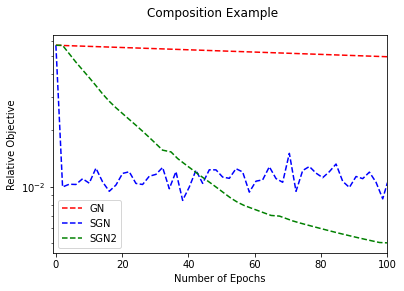

In [12]:
color = ['r','b','g']
color.extend(['C' + str(i) for i in range(10)])

minVal = np.inf
for h in history:
    minV = np.min(h['Obj'])
    if minV < minVal:
        minVal = minV

fig1 = plt.figure()
# markfreq = 2
p_epsilon = 5e-3
color_cnt = 0
for h in history:
    plt.semilogy(   np.array(h['Epochs']) ,
        np.array((h['Obj'] - minVal + p_epsilon)/(np.maximum(1, minVal))) ,
        linestyle = '--',
        color = color[color_cnt],
                )
    color_cnt += 1

fig1.suptitle( 'Composition Example ' + str() )
plt.xlabel( "Number of Epochs" )
plt.ylabel( "Relative Objective" )
plt.legend(legend_list)
plt.xlim(-1, max_num_epochs)
plt.show()
